<a href="https://colab.research.google.com/github/envgp/taking_the_pulse_example_lab/blob/main/1_hydrosphere_freshwater.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 6: Hydrosphere-Freshwater: Example of California's Central Valley

Rosemary Knight (rknight@stanford.edu) & Seogi Kang (sgkang09@stanford.edu), Stanford Environmental Geophysics Group

This week, we will explore the terrestrial water system including and how the system responds with extreme weather events (e.g., droughts) due to the climate change. Data sets used this lab are: 1) Drought intensity; 2) InSAR (interferrometric synthetic aperture radar) providing surface deformation; 3) SWE (snow water equivalence) providing mass of snow/ice/water. California's Central Valley, which is one of the most productive farmland in the world, will be the region of interest; there will be several subregions, which will allow each group to work on different subregions. 

For each data set, we will work through the following four steps:

- Step 1: Understanding data 
- Step 2: Visualizing data 
- Step 3: Processing data
- Step 4: Interpreting data

We then interpret all data sets together. 

Before diving into the lab, we are going to downlaod the data and install required python packages. 

In [1]:
!git clone https://premonition.stanford.edu/sgkang09/taking_the_pulse_data.git

Cloning into 'taking_the_pulse_data'...
remote: Enumerating objects: 14, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (5/5), done.
tcmalloc: large alloc 2010931200 bytes == 0x560daab36000 @  0x7f072ba711e7 0x560da8f95535 0x560da8f955ed 0x560da8e953ab 0x560da8e95a30 0x560da8e15a75 0x560da8e16735 0x560da8e1573a 0x7f072adb9c87 0x560da8e1578a
remote: Total 14 (delta 0), reused 0 (delta 0), pack-reused 9
Unpacking objects: 100% (14/14), done.


In [2]:
!pip install xarray numpy pandas geopandas cartopy==0.19.0.post1 ipywidgets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 5.3 MB/s 
     |████████████████████████████████| 12.1 MB 19.7 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 46 kB 3.6 MB/s 
     |████████████████████████████████| 16.7 MB 937 kB/s 
     |████████████████████████████████| 6.3 MB 48.1 MB/s 
     |████████████████████████████████| 1.6 MB 57.6 MB/s 
  Created wheel for cartopy: filename=Cartopy-0.19.0.post1-cp37-cp37m-linux_x86_64.whl size=12516305 sha256=4c3b30cf576a84cf896edd1cf8f1ea251a8e1c428b7926abaee121163e5a97bf
  Stored in directory: /root/.cache/pip/wheels/98/01/f7/bd10aeb96fe4b518cde5f7c4f5e12c7202f85b7353a5017847
Successfully built cartopy


In [1]:
import numpy as np
import xarray as xr
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib
import cartopy.crs as ccrs
import cartopy.feature as cf
import datetime
matplotlib.rcParams['font.size'] = 14

## Drought intensity

### Understanding data


The Drought intensity provides a metric for a level of drought. D1 is the least intense level and D4 the most intense. Drought is defined as a moisture deficit bad enough to have social, environmental or economic effects. Futher details about the drought intensity can be found at: https://droughtmonitor.unl.edu/About/WhatistheUSDM.aspx
    
A form of the drought intesity data that we are going to work on is the time-series with a temporal resolution of 6 days. 

Let's load the drought intensity time-series for California in a csv form. 

In [2]:
df_drought_index = pd.read_csv("./taking_the_pulse_data/data/dm_export_20150101_20191231.csv")

In [3]:
df_drought_index.head(3)

,MapDate,StateAbbreviation,None,D0,D1,D2,D3,D4,ValidStart,ValidEnd,StatisticFormatID
0,20191231,CA,96.43,3.57,0.0,0.0,0.0,0.0,2019-12-31,2020-01-06,1
1,20191224,CA,96.43,3.57,0.0,0.0,0.0,0.0,2019-12-24,2019-12-30,1
2,20191217,CA,96.43,3.57,0.0,0.0,0.0,0.0,2019-12-17,2019-12-23,1


- Column names of the drought intensity data. 
    - `None`: No drought
    - `D0`: Abnormally Dry
    - `D1`: Moderate Drought
    - `D2`: Severe Drought
    - `D3`: Extreme Drought
    - `D4`: Exceptional Drought
    - `ValidStart`: Starting date
    - `ValidEnd`: Ending date


In [4]:
start_time = pd.to_datetime(df_drought_index['ValidStart'].values)
end_time = pd.to_datetime(df_drought_index['ValidEnd'].values)
# Calculate the time interval between the two adjacent time channels
dts = end_time.to_pydatetime() - start_time.to_pydatetime()
dts[0]

datetime.timedelta(days=6)

In [5]:
# center time between start and end times
center_time = start_time.shift(3, freq='D')

### Visualizing data

Text(0.5, 1.0, 'California')

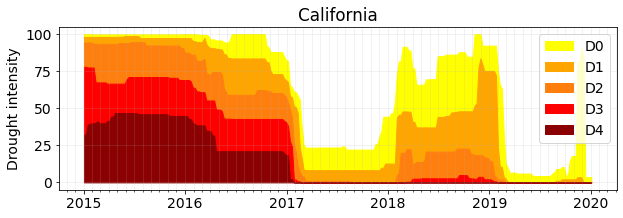

In [6]:
fig = plt.figure(figsize=(10, 3))
colors = ['yellow', 'orange', 'C1', 'red', 'darkred']
plt.fill_between(center_time, df_drought_index['D0'], y2=df_drought_index['D1'], color=colors[0], label='D0')
plt.fill_between(center_time, df_drought_index['D1'], y2=df_drought_index['D2'], color=colors[1], label='D1')
plt.fill_between(center_time, df_drought_index['D2'], y2=df_drought_index['D3'], color=colors[2], label='D2')
plt.fill_between(center_time, df_drought_index['D3'], y2=df_drought_index['D4'], color=colors[3], label='D3')
plt.fill_between(center_time, df_drought_index['D4'], y2=0, color=colors[4], label='D4')
plt.legend()
ax = plt.gca()
fmt_month = mdates.MonthLocator()
ax.xaxis.set_minor_locator(fmt_month)
ax.grid(True, which='both', alpha=0.2)
ax.set_ylabel("Drought intensity")
ax.set_title("California")
# plt.plot(start_time, df_drought_index['D5'])

Go the the following link: https://droughtmonitor.unl.edu/DmData/TimeSeries.aspx and choose `AreaType`: State & `Area`: California; see if the above plot is similar to the one shown on the webpage. 

### Interpreting data

#### Q1: What is the major trend that you see in the drought intensity time-series shown above plot?

## SWE data
### Understanding data

Snow water equivalent (SWE) data provides information about the mass changes of snow/ice/water around the mountain ranges near the Central Valley of California. Sophisticated processings were applied to obtain these data, and two major inputs were: 1) remotely sensed snow cover images (e.g., MODIS Snow-Covered Area and Grain size) and 2) in situ snow sensor observations (on the ground). Further details about this data set can be found at the following link:  https://doi.org/10.1002/wrcr.20387. 

Spatial resolution was about 500 m and the temporal resolution was monthly. 

Let load the data. 

In [7]:
swe_data = xr.load_dataset("./taking_the_pulse_data/data/swe_data.nc")

In [9]:
swe_data

<xarray.Dataset>
Dimensions:  (time: 116, lat: 1584, lon: 1368)
Coordinates:
  * time     (time) datetime64[ns] 2000-11-01 2000-12-01 ... 2019-06-01
  * lon      (lon) float64 -123.3 -123.3 -123.3 -123.3 ... -117.6 -117.6 -117.6
  * lat      (lat) float64 42.0 41.99 41.99 41.99 ... 35.42 35.41 35.41 35.4
Data variables:
    swe      (time, lat, lon) float64 nan nan nan nan nan ... nan nan nan nan

In [10]:
# sampling interval in a longitudal direction
x_swe = swe_data['lon']
np.diff(x_swe)[0] * (111*1e3)

462.5000000816044

In [11]:
# sampling interval in a latitudal direction
y_swe = swe_data['lat']
np.diff(y_swe)[0] * (111*1e3)

-462.5000000697739

In [12]:
# sampling interval in a time direction
time_swe = swe_data['time']
time_swe.to_series().diff()[:5]

time
2000-11-01       NaT
2000-12-01   30 days
2001-01-01   31 days
2001-02-01   31 days
2001-03-01   28 days
Name: time, dtype: timedelta64[ns]

### Visualizing data
#### 2D map at a time channel

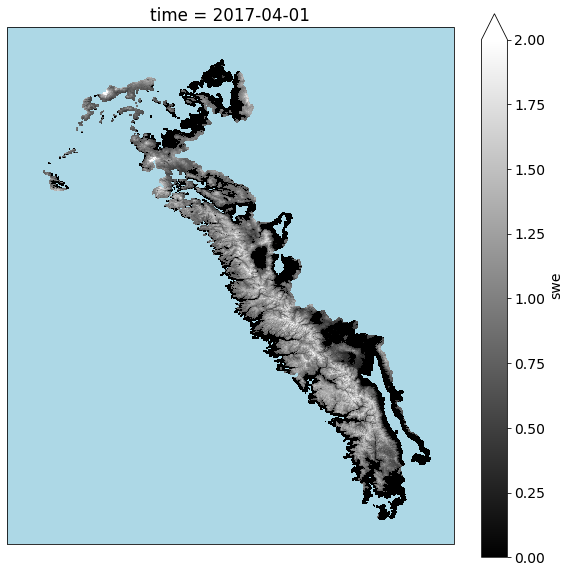

In [13]:
# fig, ax = plt.subplots(1,1, figsize=(10, 10))
i_time = 100
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection=ccrs.PlateCarree())
out = swe_data.swe.isel(time=i_time).plot(ax=ax, cmap='binary_r', vmin=0, vmax=2)
ax.set_aspect(1)
ax.set_facecolor('lightblue')

Just show the data

In [16]:
swe_data.swe.shape

(116, 1584, 1368)

In [14]:
# find indicies of pixels where the data are present
index_active_swe = ~np.isnan(swe_data.swe.data).all(axis=0)
swe_active = swe_data.swe.data[:,index_active_swe]

# get gridded points of SWE data
Xswe, Yswe = np.meshgrid(x_swe, y_swe)
Xswe_active = Xswe[index_active_swe]
Yswe_active = Yswe[index_active_swe]

In [17]:
swe_active.shape


(116, 318141)

Add other geographical features; plot a data location at i-th pixel.

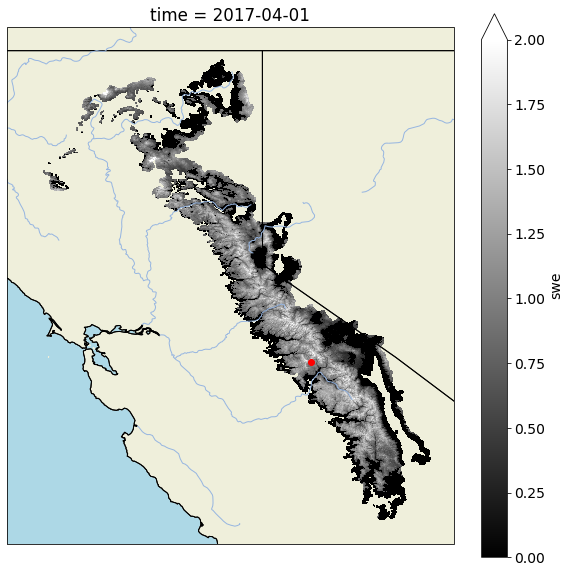

In [19]:
i_time = 100
i_pixel = -100000
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection=ccrs.PlateCarree())
# ax.axes.add_feature(cf.BORDERS)
ax.axes.add_feature(cf.COASTLINE)
ax.axes.add_feature(cf.LAND);
ax.axes.add_feature(cf.STATES);
out = swe_data.swe.isel(time=i_time).plot(ax=ax, cmap='binary_r', vmin=0, vmax=2)
ax.axes.add_feature(cf.RIVERS);
ax.set_facecolor('lightblue')
# ax.axis('off')
ax.set_aspect(1)
ax.plot(Xswe_active[i_pixel], Yswe_active[i_pixel], 'ro')

### Time series at a grid pixel

Text(0, 0.5, 'SWE (m)')

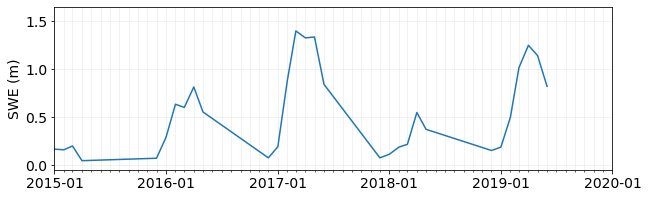

In [20]:
i_pixel = -100000
fig, ax = plt.subplots(1,1,figsize=(10, 3))
ax.plot(swe_data.swe.time, swe_active[:,i_pixel])
fmt_month = mdates.MonthLocator()
ax.xaxis.set_minor_locator(fmt_month)
ax.grid(True, which='both', alpha=0.2)
ax.set_xlim(datetime.date(2015, 1, 1), datetime.date(2020, 1, 1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax.set_ylabel("SWE (m)")

### Processing data

Calculate the spatial integral of the SWE data resulting in a total SWE time-series.

In [21]:
# area of a each pixel [m^2]
area_pixel_swe = (462.5)**2
# total swe time-series in [km^3]
total_swe_values = swe_active.sum(axis=1)* area_pixel_swe / 1e9

Text(0, 0.5, 'Total SWE (km$^3$)')

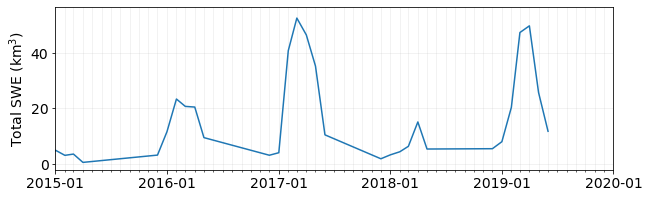

In [22]:
fig, ax = plt.subplots(1,1,figsize=(10, 3))
ax.plot(swe_data.time, total_swe_values)
fmt_month = mdates.MonthLocator()
ax.xaxis.set_minor_locator(fmt_month)
ax.grid(True, which='both', alpha=0.2)
ax.set_xlim(datetime.date(2015, 1, 1), datetime.date(2020, 1, 1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax.set_ylabel("Total SWE (km$^3$)")

### Interpreting data

For interpreting the SWE data, let plot the toatl SWE time-series and the drought intensity time-series together. 

Text(0, 0.5, 'Drought intensity')

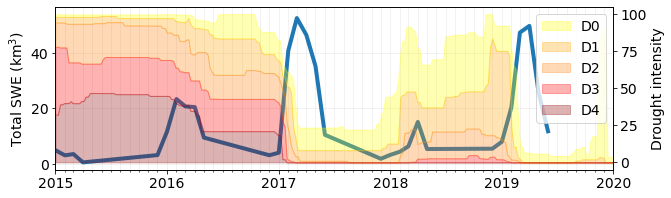

In [23]:
fig, ax = plt.subplots(1,1,figsize=(10, 3))
ax.plot(swe_data.time, total_swe_values, zorder=999, lw=4)
fmt_month = mdates.MonthLocator()
ax.xaxis.set_minor_locator(fmt_month)
ax.grid(True, which='both', alpha=0.2)
ax.set_xlim(datetime.date(2015, 1, 1), datetime.date(2020, 1, 1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax.set_ylabel("Total SWE (km$^3$)")

alpha_value = 0.3

ax_1 = ax.twinx()
colors = ['yellow', 'orange', 'C1', 'red', 'darkred']
ax_1.fill_between(center_time, df_drought_index['D0'], y2=df_drought_index['D1'], color=colors[0], label='D0', alpha=alpha_value)
ax_1.fill_between(center_time, df_drought_index['D1'], y2=df_drought_index['D2'], color=colors[1], label='D1', alpha=alpha_value)
ax_1.fill_between(center_time, df_drought_index['D2'], y2=df_drought_index['D3'], color=colors[2], label='D2', alpha=alpha_value)
ax_1.fill_between(center_time, df_drought_index['D3'], y2=df_drought_index['D4'], color=colors[3], label='D3', alpha=alpha_value)
ax_1.fill_between(center_time, df_drought_index['D4'], y2=0, color=colors[4], label='D4', alpha=alpha_value)
ax_1.legend()
ax = plt.gca()
ax_1.set_ylabel("Drought intensity")

#### Q2: Do you see any correlation between the two time-series? If so, is the correlation making sense to you? Why?

## InSAR data
### Understanding data

Interferrometric synthetic aperture radar (InSAR) data measures the phase difference of the electromagnetic waves transmitted from the satellite to the ground surface. With sophisticated processing, time series of surface deformation are obtained with about 6-7 days of temporal resolution and about 20-100 m spatial resolution. This InSAR data were gridded onto a uniform grid with a cell size about 1 km x 1 km. Further details of these InSAR data can be found at the following link: https://data.cnra.ca.gov/dataset/tre-altamira-insar-subsidence.

Let load the InSAR data. 

In [24]:
insar_data = xr.load_dataset("./taking_the_pulse_data/data/insar_data.nc")

In [25]:
# sampling interval in a longitudal direction
x_insar = insar_data['lon']
np.diff(x_insar)[0] * (111)

1.1127475247523222

In [26]:
# sampling interval in a longitudal direction
y_insar = insar_data['lat']
np.diff(y_insar)[0] * (111)

1.111923743501002

In [27]:
# sampling interval in a time direction
time_insar = insar_data['time']
time_insar.to_series().diff()[:5]

time
2015-01-01      NaT
2015-01-07   6 days
2015-01-13   6 days
2015-01-20   7 days
2015-01-26   6 days
Name: time, dtype: timedelta64[ns]

### Visualizing data
#### 2D map at a time channel

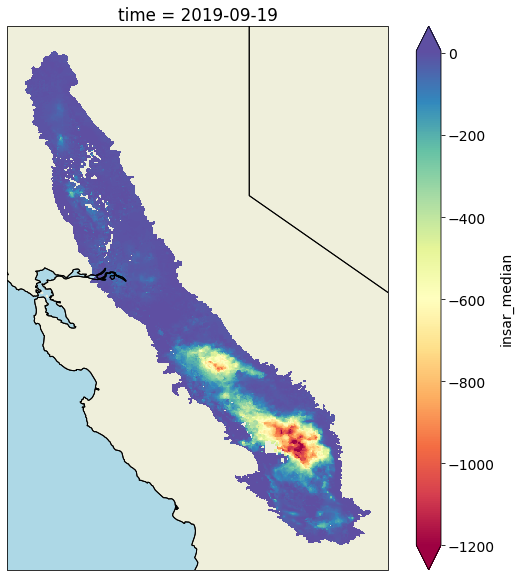

In [28]:
i_time = -1
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection=ccrs.PlateCarree())
# ax.axes.add_feature(cf.BORDERS)
ax.axes.add_feature(cf.COASTLINE)
ax.axes.add_feature(cf.LAND);
ax.axes.add_feature(cf.STATES);
out = insar_data.insar_median.isel(time=i_time).plot(ax=ax, cmap='Spectral', vmin=-1200, vmax=5)
# ax.axes.add_feature(cf.RIVERS);
ax.set_facecolor('lightblue')
# ax.axis('off')
ax.set_aspect(1)
# ax.plot(x_insar[600], y_insar[500], 'ro')

In [29]:
# find indicies of pixels where the data are present
index_active_insar = ~np.isnan(insar_data.insar_median.data).all(axis=0)
insar_active = insar_data.insar_median.data[:,index_active_insar]
insar_active[np.isnan(insar_active)] = 0.
# get gridded points of insar data
Xinsar, Yinsar = np.meshgrid(x_insar, y_insar)
Xinsar_active = Xinsar[index_active_insar]
Yinsar_active = Yinsar[index_active_insar]

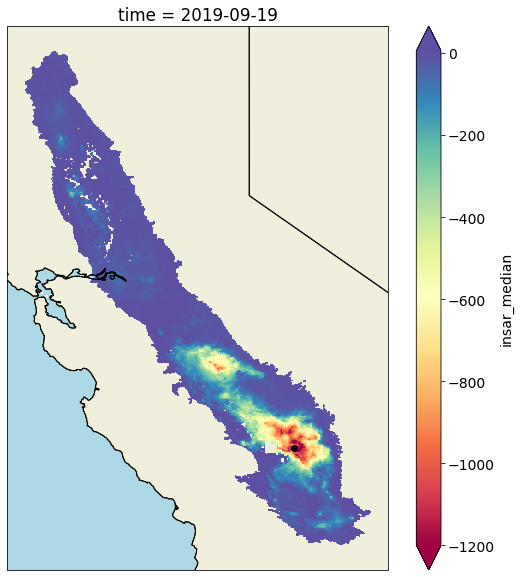

In [30]:
i_time = -1
i_pixel = 10000

fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection=ccrs.PlateCarree())
# ax.axes.add_feature(cf.BORDERS)
ax.axes.add_feature(cf.COASTLINE)
ax.axes.add_feature(cf.LAND);
ax.axes.add_feature(cf.STATES);
out = insar_data.insar_median.isel(time=i_time).plot(ax=ax, cmap='Spectral', vmin=-1200, vmax=5)
# ax.axes.add_feature(cf.RIVERS);
ax.set_facecolor('lightblue')
# ax.axis('off')
ax.set_aspect(1)
ax.plot(Xinsar_active[i_pixel], Yinsar_active[i_pixel], 'ko')
# ca_basins_cv.plot(facecolor='None', ax=ax)

#### Time series at a grid pixel

Text(0.5, 1.0, '')

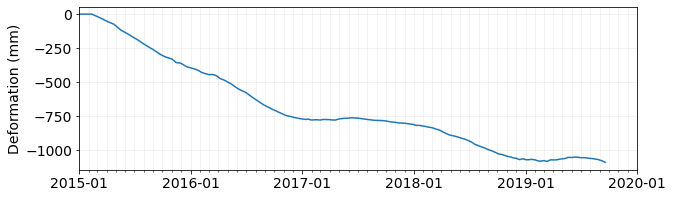

In [31]:
fig, ax = plt.subplots(1,1,figsize=(10, 3))
ax.plot(insar_data.insar_median.time, insar_active[:,i_pixel])
fmt_month = mdates.MonthLocator()
ax.xaxis.set_minor_locator(fmt_month)
ax.grid(True, which='both', alpha=0.2)
ax.set_xlim(datetime.date(2015, 1, 1), datetime.date(2020, 1, 1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax.set_ylabel("Deformation (mm)")
ax.set_title("")

### Processing data

Import groundwater basins boundaries in the Central Valley. 

In [32]:
# ca_basins = gpd.read_file("C:/Users/sgkan/Dropbox/Accelerator/Shapefiles/California Groundwater Basins/CA_Bullitin118Basins.shp")
# ca_basins_cv = ca_basins[
#     (ca_basins['Basin_Name']=='SAN JOAQUIN VALLEY') | 
#     (ca_basins['Basin_Name']=='SACRAMENTO VALLEY') | 
#     (ca_basins['Basin_Name']=='REDDING AREA')
# ]
# ca_basins_cv.to_file("cv_gw_basins.geojson")

In [33]:
ca_basins_cv = gpd.read_file("./taking_the_pulse_data/data/cv_gw_basins.geojson")

Plot them up on the InSAR data map. 

Select a subbasin of interest. 

In [34]:
from ipywidgets import widgets, interact
subbasin_names = np.sort(ca_basins_cv['Basin_Su_1'].values)
def foo(name):
    fig = plt.figure(figsize=(10, 10))
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.axes.add_feature(cf.COASTLINE)
    ax.axes.add_feature(cf.LAND);
    ax.axes.add_feature(cf.STATES);
    out = insar_data.insar_median.isel(time=i_time).plot(ax=ax, cmap='Spectral', vmin=-1200, vmax=5)
    ca_basins_cv.boundary.plot(ax=ax, color='k')
    ca_basins_cv[ca_basins_cv['Basin_Su_1']==name].plot(ax=ax, color='red', alpha=0.5)
    ax.set_title(name, fontsize=12)
    plt.show()

In [35]:
Q = interact(foo, name=widgets.Select(options=subbasin_names, value='SAN JOAQUIN VALLEY - TULE'))

interactive(children=(Select(description='name', index=36, options=('REDDING AREA - ANDERSON', 'REDDING AREA -…

In [37]:
Q.widget.kwargs

{'name': 'REDDING AREA - ANDERSON'}

In [38]:
# find indicies of the points within a polygon
name = Q.widget.kwargs['name']
_pnts = gpd.points_from_xy(Xinsar_active, Yinsar_active)
pnts = gpd.GeoDataFrame(geometry=_pnts)
inds_active_subbasin = pnts.within(
    ca_basins_cv.geometry[np.argwhere((ca_basins_cv['Basin_Su_1']==name).values)[0][0]]
).values

# calculate the mean time-series
insar_mean_time_series = insar_active[:,inds_active_subbasin].mean(axis=1)

Plot the mean InSAR time-series of the selected subbasin. 

Text(0.5, 1.0, 'REDDING AREA - ENTERPRISE')

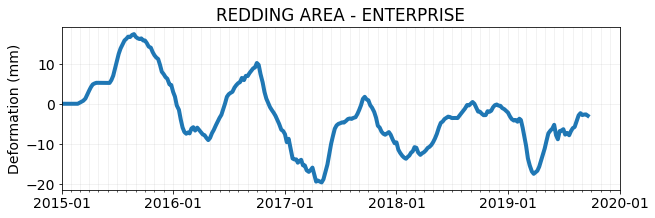

In [39]:
fig, ax = plt.subplots(1,1,figsize=(10, 3))
# nskip = 10
# out = ax.plot(time_insar, insar_active[:,inds_active_subbasin][:,::nskip], color='C0', alpha=0.1)
out = ax.plot(time_insar, insar_mean_time_series, color='C0', lw=4)
fmt_month = mdates.MonthLocator()
ax.xaxis.set_minor_locator(fmt_month)
ax.grid(True, which='both', alpha=0.2)
ax.set_xlim(datetime.date(2015, 1, 1), datetime.date(2020, 1, 1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax.set_ylabel("Deformation (mm)")
ax.set_title(name)

### Interpreting data

Text(0, 0.5, 'Drought intensity')

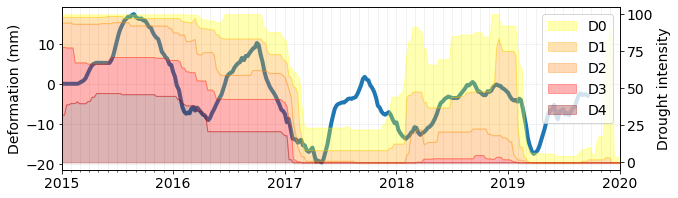

In [40]:
fig, ax = plt.subplots(1,1,figsize=(10, 3))
# ax.plot(swe_data.time, total_swe_values, zorder=999, lw=4)
out = ax.plot(time_insar, insar_mean_time_series, color='C0', lw=4)
fmt_month = mdates.MonthLocator()
ax.xaxis.set_minor_locator(fmt_month)
ax.grid(True, which='both', alpha=0.2)
ax.set_xlim(datetime.date(2015, 1, 1), datetime.date(2020, 1, 1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax.set_ylabel("Deformation (mm)")

alpha_value = 0.3

ax_1 = ax.twinx()
colors = ['yellow', 'orange', 'C1', 'red', 'darkred']
ax_1.fill_between(center_time, df_drought_index['D0'], y2=df_drought_index['D1'], color=colors[0], label='D0', alpha=alpha_value)
ax_1.fill_between(center_time, df_drought_index['D1'], y2=df_drought_index['D2'], color=colors[1], label='D1', alpha=alpha_value)
ax_1.fill_between(center_time, df_drought_index['D2'], y2=df_drought_index['D3'], color=colors[2], label='D2', alpha=alpha_value)
ax_1.fill_between(center_time, df_drought_index['D3'], y2=df_drought_index['D4'], color=colors[3], label='D3', alpha=alpha_value)
ax_1.fill_between(center_time, df_drought_index['D4'], y2=0, color=colors[4], label='D4', alpha=alpha_value)
ax_1.legend()
ax = plt.gca()
ax_1.set_ylabel("Drought intensity")

#### Q3: Do you see any correlation between the two time-series? If so, is the correlation making sense to you? Why?

## Work at home
## Put all things together

Load the drought index data for a broader time period and plot them up. 

In [59]:
df_drought_index = pd.read_csv("./taking_the_pulse_data/data/dm_export_20000101_20221128.csv")

start_time = pd.to_datetime(df_drought_index['ValidStart'].values)
end_time = pd.to_datetime(df_drought_index['ValidEnd'].values)
# Calculate the time interval between the two adjacent time channels
dts = end_time.to_pydatetime() - start_time.to_pydatetime()
# center time between start and end times
center_time = start_time.shift(3, freq='D')

In [ ]:
# fill in the the cell, and generate the plot
fig = plt.figure(figsize=(20, 3))
colors = ['yellow', 'orange', 'C1', 'red', 'darkred']
plt.fill_between(center_time, df_drought_index['D0'], y2=df_drought_index['D1'], color=colors[0], label='D0')
plt.fill_between(center_time, df_drought_index['D1'], y2=df_drought_index['D2'], color=colors[1], label='D1')
plt.fill_between(center_time, df_drought_index['D2'], y2=df_drought_index['D3'], color=colors[2], label='D2')
plt.fill_between(center_time, df_drought_index['D3'], y2=df_drought_index['D4'], color=colors[3], label='D3')
plt.fill_between(center_time, df_drought_index['D4'], y2=0, color=colors[4], label='D4')
plt.legend()
ax = plt.gca()
fmt_month = mdates.MonthLocator()
ax.xaxis.set_minor_locator(fmt_month)
ax.grid(True, which='both', alpha=0.2)
ax.set_ylabel("Drought intensity")
ax.set_title("California")
# plt.plot(start_time, df_drought_index['D5'])

#### Q4: Plot the total SWE time-series and the drought index together (fill in the cell below with codes that can generate the plot)

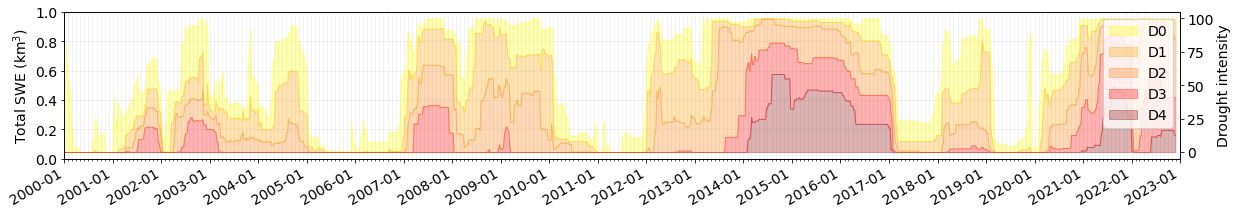

In [60]:
fig, ax = plt.subplots(1,1,figsize=(20, 3))
ax_1 = ax.twinx()
# add a line that can plot the total swe time series
# ax.plot(swe_data.time, total_swe_values, zorder=999, lw=4)
alpha_value = 0.3
colors = ['yellow', 'orange', 'C1', 'red', 'darkred']
ax_1.fill_between(center_time, df_drought_index['D0'], y2=df_drought_index['D1'], color=colors[0], label='D0', alpha=alpha_value)
ax_1.fill_between(center_time, df_drought_index['D1'], y2=df_drought_index['D2'], color=colors[1], label='D1', alpha=alpha_value)
ax_1.fill_between(center_time, df_drought_index['D2'], y2=df_drought_index['D3'], color=colors[2], label='D2', alpha=alpha_value)
ax_1.fill_between(center_time, df_drought_index['D3'], y2=df_drought_index['D4'], color=colors[3], label='D3', alpha=alpha_value)
ax_1.fill_between(center_time, df_drought_index['D4'], y2=0, color=colors[4], label='D4', alpha=alpha_value)
ax_1.legend()
ax_1.set_ylabel("Drought intensity")
fmt_year = mdates.YearLocator()
ax.xaxis.set_major_locator(fmt_year)
fmt_month = mdates.MonthLocator()
ax.xaxis.set_minor_locator(fmt_month)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax.set_ylabel("Total SWE (km$^3$)")
ax.grid(True, which='both', alpha=0.2)
ax.set_xlim(datetime.date(2000, 1, 1), datetime.date(2023, 1, 1))
fig.autofmt_xdate()

#### Q5: Do you see expected correlation between the two time-series? If so, explain your observation. 

#### Q6: For about 20-year time span, how many years were there where the peak total SWE was greater than 40 km^3?

(5 years; 2005, 2006, 2011, 2017, 2019)

In [ ]:
# pd.to_datetime(swe_data.time[total_swe_values>40].data).year.unique()

#### Q7: We will estimate the montly total SWE at the times of the drought index data using a linear regression. Answer the quetions posed below. 

$$ \min_{w} || X w - y||_2^2 $$


 $y$: a vector of observed values (n_samples x 1)
- $X$: a matrix (n_samples x n_features)
- unknown is a coefficient vector, $w$ (n_features x 1)
- `n_samples = n_times`
- `n_features = len(['None', 'D0', 'D1', 'D2', 'D3', 'D4'])`

In [43]:
# adding center_time to df_drought_index table
df_drought_index['center_time'] = center_time
df_drought_index = df_drought_index.set_index('center_time')
df_drought_index_daily = df_drought_index.resample('D').mean()
df_drought_index_daily = df_drought_index_daily.interpolate(method='pad')

In [44]:
# X = df_drought_index_daily.loc[pd.to_datetime(time_swe.data)][['None', 'D0', 'D1', 'D2', 'D3', 'D4']].values
features = ['None', 'D0', 'D1', 'D2', 'D3', 'D4']
X = df_drought_index_daily.loc[pd.to_datetime(time_swe.data)][features].values
y = total_swe_values

In [45]:
import numpy as np
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X, y)
reg.score(X, y)
y_pred = reg.predict(X)
print ("R^2 coefficient of the least square is {:.2f} (1 is the perfect fit)".format(reg.score(X, y)))

R^2 coefficient of the least square is 0.26 (1 is the perfect fit)


Plot the observed and predicted data

Text(0, 0.5, 'Predicted')

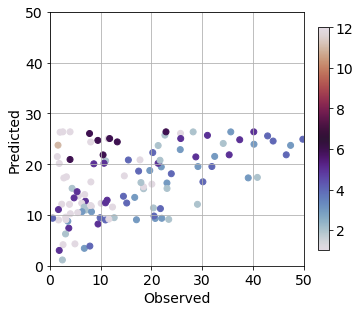

In [46]:
fig, ax = plt.subplots(1,1,figsize=(5, 5))
out = ax.scatter(y, y_pred, c=pd.to_datetime(time_swe.data).month, cmap='twilight')
plt.colorbar(out, fraction=0.04, ax=ax)
ax.set_xlim(0, 50)
ax.set_ylim(0, 50)
ax = plt.gca()
ax.set_aspect(1)
ax.grid(True)
ax.set_xlabel("Observed")
ax.set_ylabel("Predicted")
# plt.plot(time_swe,  '.-')?

Q7-A Describe the data fit between the observed and the predicted data. 

Q7-B Fill in `X_est` in the below cell. 

In [47]:
# Fill in X_est
# X_est = ??
# Solution
# X_est = df_drought_index[['None', 'D0', 'D1', 'D2', 'D3', 'D4']].values
X_est = df_drought_index[features].values

Estimate the total SWE time-series. 

In [48]:
y_est = reg.predict(X_est)

Plot the estimated total SWE and observed total SWE

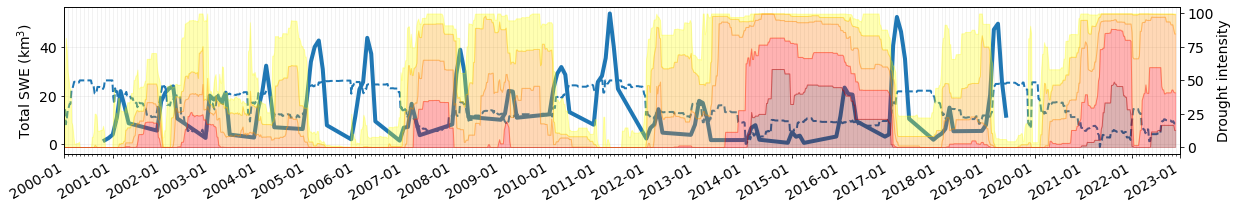

In [49]:
fig, ax = plt.subplots(1,1,figsize=(20, 3))
ax_1 = ax.twinx()
ax.plot(swe_data.time, y, zorder=999, lw=4)
ax.plot(center_time, y_est, zorder=999, lw=2, linestyle='--', color='C0')
alpha_value = 0.3
colors = ['yellow', 'orange', 'C1', 'red', 'darkred']
ax_1.fill_between(center_time, df_drought_index['D0'], y2=df_drought_index['D1'], color=colors[0], label='D0', alpha=alpha_value)
ax_1.fill_between(center_time, df_drought_index['D1'], y2=df_drought_index['D2'], color=colors[1], label='D1', alpha=alpha_value)
ax_1.fill_between(center_time, df_drought_index['D2'], y2=df_drought_index['D3'], color=colors[2], label='D2', alpha=alpha_value)
ax_1.fill_between(center_time, df_drought_index['D3'], y2=df_drought_index['D4'], color=colors[3], label='D3', alpha=alpha_value)
ax_1.fill_between(center_time, df_drought_index['D4'], y2=0, color=colors[4], label='D4', alpha=alpha_value)
ax_1.set_ylabel("Drought intensity")
fmt_year = mdates.YearLocator()
ax.xaxis.set_major_locator(fmt_year)
fmt_month = mdates.MonthLocator()
ax.xaxis.set_minor_locator(fmt_month)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax.set_ylabel("Total SWE (km$^3$)")
ax.grid(True, which='both', alpha=0.2)
ax.set_xlim(datetime.date(2000, 1, 1), datetime.date(2023, 1, 1))
fig.autofmt_xdate()

Q7-C There are no SWE data after 2019-06-01, but you were able to estimate the total SWE between 2019-06-01 ad 2022-11-25. Do you think your estimated total SWE data at this time interval is accurate? Describe a positive aspect of your estimation. 

#### Q8 We are going to work on the InSAR data in a groundwater subbasin. Select a subbasin among the options given below, and create a plot displaying the mean InSAR time-series and the drought index together. Set the time period of the display from 2010-01-01 to 2020-01-01. 

- `SAN JOAQUIN VALLEY - WESTSIDE`
- `SAN JOAQUIN VALLEY - KAWEAH`
- `REDDING AREA - MILLVILLE`
- `SACRAMENTO VALLEY - VINA`

Use the below widget to display the selected subasin. 

In [50]:
Q = interact(foo, name=widgets.Select(options=subbasin_names, value='SAN JOAQUIN VALLEY - TULE'))

interactive(children=(Select(description='name', index=36, options=('REDDING AREA - ANDERSON', 'REDDING AREA -…

In [54]:
# find indicies of the points within a polygon
# You neeed to substitute the name 
name = 'SACRAMENTO VALLEY - VINA'
_pnts = gpd.points_from_xy(Xinsar_active, Yinsar_active)
pnts = gpd.GeoDataFrame(geometry=_pnts)
inds_active_subbasin = pnts.within(
    ca_basins_cv.geometry[np.argwhere((ca_basins_cv['Basin_Su_1']==name).values)[0][0]]
).values

# calculate the mean time-series
insar_mean_time_series = insar_active[:,inds_active_subbasin].mean(axis=1)

In [57]:
fig, ax = plt.subplots(1,1,figsize=(10, 3))
# ax.plot(swe_data.time, total_swe_values, zorder=999, lw=4)
out = ax.plot(time_insar, insar_mean_time_series, color='C0', lw=4)

alpha_value = 0.3

ax_1 = ax.twinx()
colors = ['yellow', 'orange', 'C1', 'red', 'darkred']
ax_1.fill_between(center_time, df_drought_index['D0'], y2=df_drought_index['D1'], color=colors[0], label='D0', alpha=alpha_value)
ax_1.fill_between(center_time, df_drought_index['D1'], y2=df_drought_index['D2'], color=colors[1], label='D1', alpha=alpha_value)
ax_1.fill_between(center_time, df_drought_index['D2'], y2=df_drought_index['D3'], color=colors[2], label='D2', alpha=alpha_value)
ax_1.fill_between(center_time, df_drought_index['D3'], y2=df_drought_index['D4'], color=colors[3], label='D3', alpha=alpha_value)
ax_1.fill_between(center_time, df_drought_index['D4'], y2=0, color=colors[4], label='D4', alpha=alpha_value)
# ax_1.legend()
ax_1.set_ylabel("Drought intensity")
fmt_month = mdates.MonthLocator()
ax.xaxis.set_minor_locator(fmt_month)
ax.set_xlim(datetime.date(2010, 1, 1), datetime.date(2020, 1, 1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax.set_ylabel("Deformation (mm)")
ax.grid(True, which='both', alpha=0.2)
fig.autofmt_xdate()

Q8-A What is the cause of the interannual subsidence? Describe the causal relationship between the two time-series [Note: be specific about the interannual trend of the two time-series]. 

Reduce the time period of the plot from 2015-01-01 to 2020-01-01.

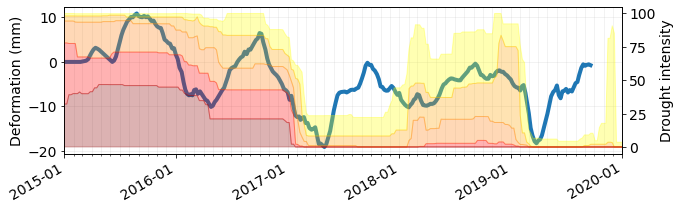

In [56]:
fig, ax = plt.subplots(1,1,figsize=(10, 3))
# ax.plot(swe_data.time, total_swe_values, zorder=999, lw=4)
out = ax.plot(time_insar, insar_mean_time_series, color='C0', lw=4)

alpha_value = 0.3

ax_1 = ax.twinx()
colors = ['yellow', 'orange', 'C1', 'red', 'darkred']
ax_1.fill_between(center_time, df_drought_index['D0'], y2=df_drought_index['D1'], color=colors[0], label='D0', alpha=alpha_value)
ax_1.fill_between(center_time, df_drought_index['D1'], y2=df_drought_index['D2'], color=colors[1], label='D1', alpha=alpha_value)
ax_1.fill_between(center_time, df_drought_index['D2'], y2=df_drought_index['D3'], color=colors[2], label='D2', alpha=alpha_value)
ax_1.fill_between(center_time, df_drought_index['D3'], y2=df_drought_index['D4'], color=colors[3], label='D3', alpha=alpha_value)
ax_1.fill_between(center_time, df_drought_index['D4'], y2=0, color=colors[4], label='D4', alpha=alpha_value)
# ax_1.legend()
ax_1.set_ylabel("Drought intensity")
fmt_month = mdates.MonthLocator()
ax.xaxis.set_minor_locator(fmt_month)
ax.set_xlim(datetime.date(2015, 1, 1), datetime.date(2020, 1, 1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax.set_ylabel("Deformation (mm)")
ax.grid(True, which='both', alpha=0.2)
fig.autofmt_xdate()

Q8-B Do you see any seasonal trends? If not your answer is simply "no". If so, describe the seasonal trends in the mean InSAR time-series (e.g., timing of peaks and troughts; amplitude), and explain the cause of the seasonal trend. 

[ANSWER] Q8-B: FILL IN

Q9 **[BONUS question, but advanced]** Our estimate of the total SWE time-series from using the drought index time-series was relatively poor (R^2 about 0.26). A) Obtain the mean InSAR time-series within `REDDING AREA - MILLVILLE` or `SACRAMENTO VALLEY - VINA`; B) Detrend the interannual trend within the mean time-series (e.g., use moving average with one-year window); C) Use the detrended mean InSAR time-series as well as the drought index to estimate the total SWE time-series using a linear regression; report your score of the linear regression (i.e., R^2). 